In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Background:
  I want to start investing money and withdraw on January or February
  Two asset class:  6-months US Treasury Bills or US Stocks
Problem:
  Which asset class should I choose to maximise profit?
  Particularly, what's the chance of earning more money from stocks over the next 6 months than bonds?

In [3]:
tickers = ['SPY', 'GOOG', 'MSFT', 'NVDA', 'META', 'AAPL', 'AMZN', 'TSLA', 'LULU']
df = yf.download(tickers, start='1900-01-01')
df = df['Close']
df

[*********************100%%**********************]  9 of 9 completed


Ticker,AAPL,AMZN,GOOG,LULU,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.121652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.112723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-22,224.529999,176.130005,165.490005,263.450012,531.929993,415.549988,123.739998,556.219971,210.660004
2024-08-23,226.839996,177.039993,167.429993,268.549988,528.000000,416.790009,129.369995,562.130005,220.320007
2024-08-26,227.179993,175.500000,167.929993,271.660004,521.119995,413.489990,126.459999,560.789978,213.210007


In [55]:
days = [19, 39, 58, 78, 97]
fut_rets = df.shift(-days[1]) / df - 1
fut_rets

Ticker,AAPL,AMZN,GOOG,LULU,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,
1980-12-12,-0.052171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.044561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.009661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,-0.042259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


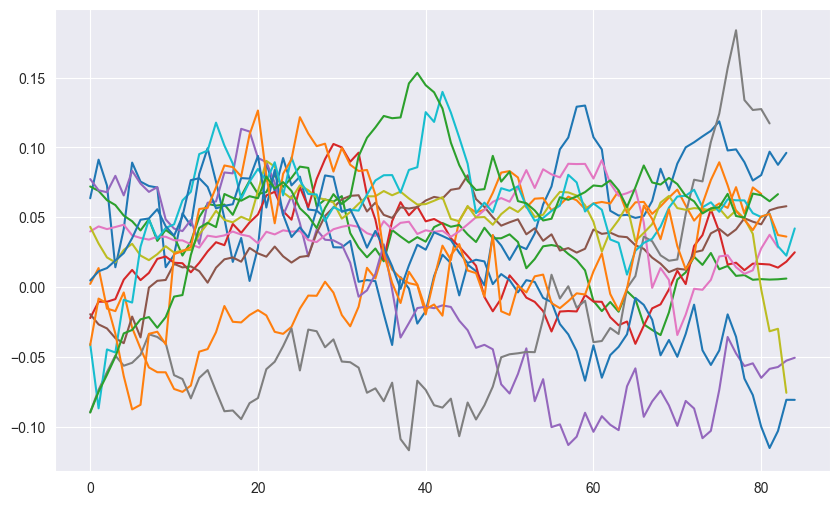

In [56]:
after_sep = fut_rets[(9 <= fut_rets.index.month) & (fut_rets.index.month <= 12)]

plt.figure(figsize=(10, 6))
for _df_y in after_sep['SPY'].groupby(after_sep.index.year):
    if _df_y[1].index.year[0] <= 2010:
        continue
    plt.plot(_df_y[1].values)

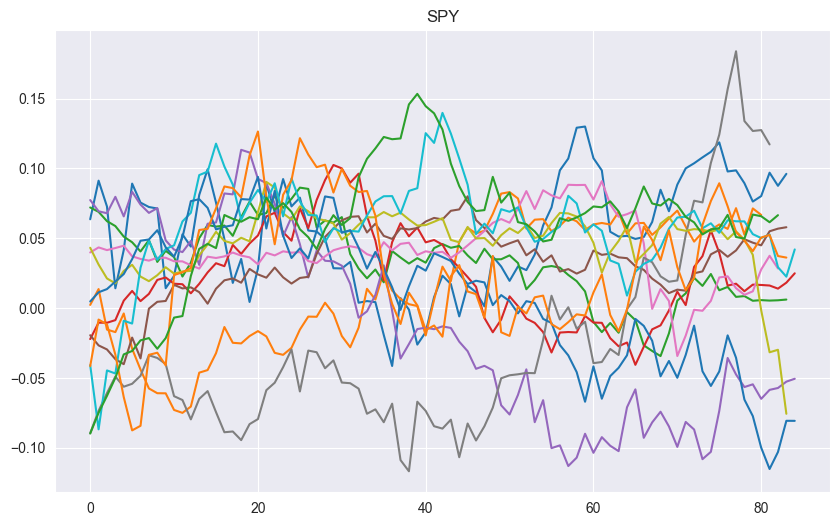

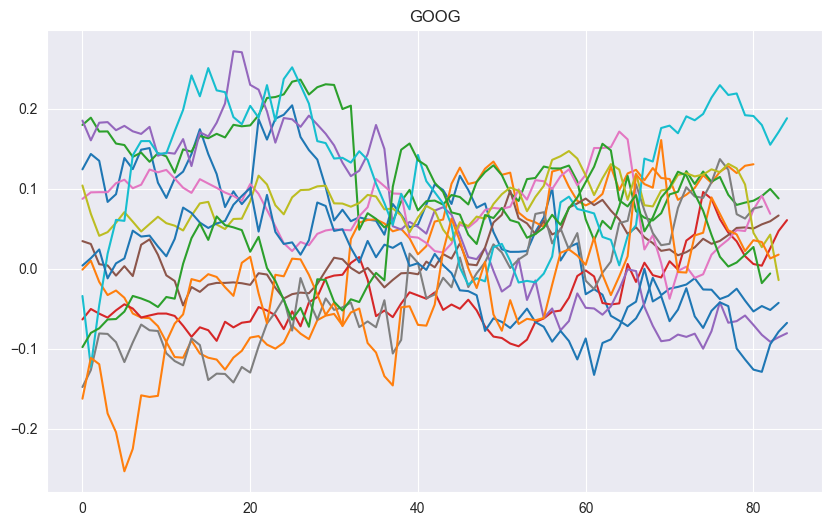

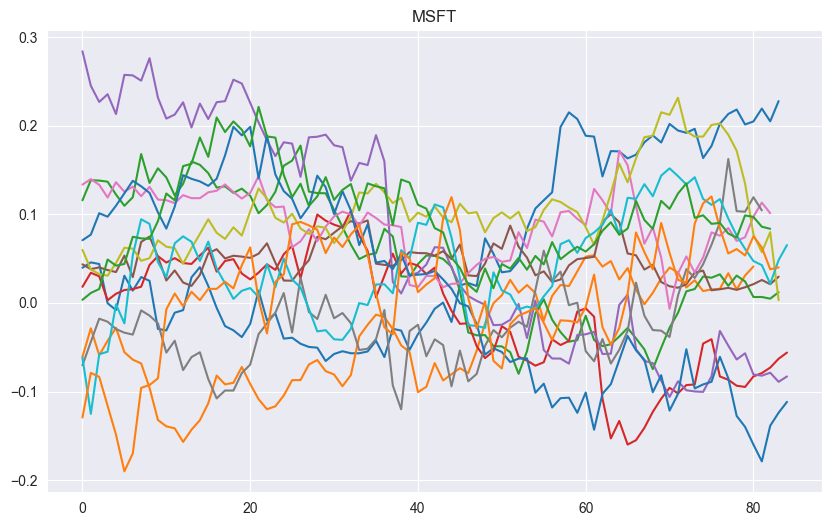

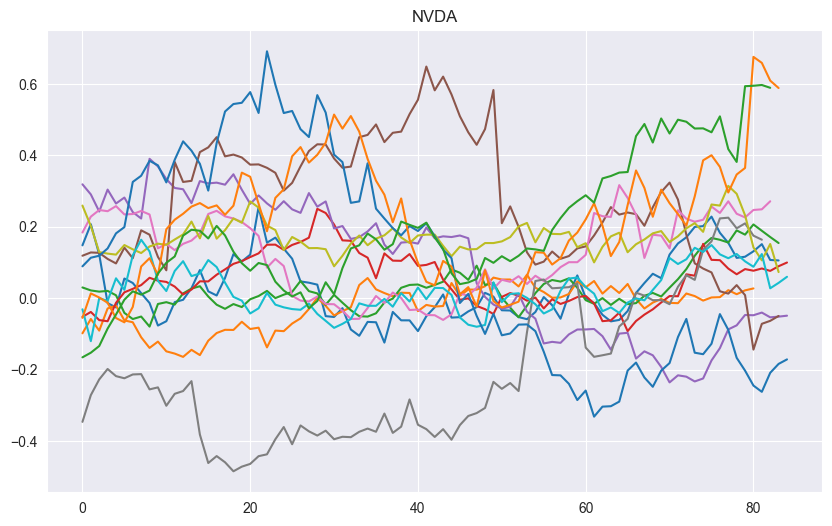

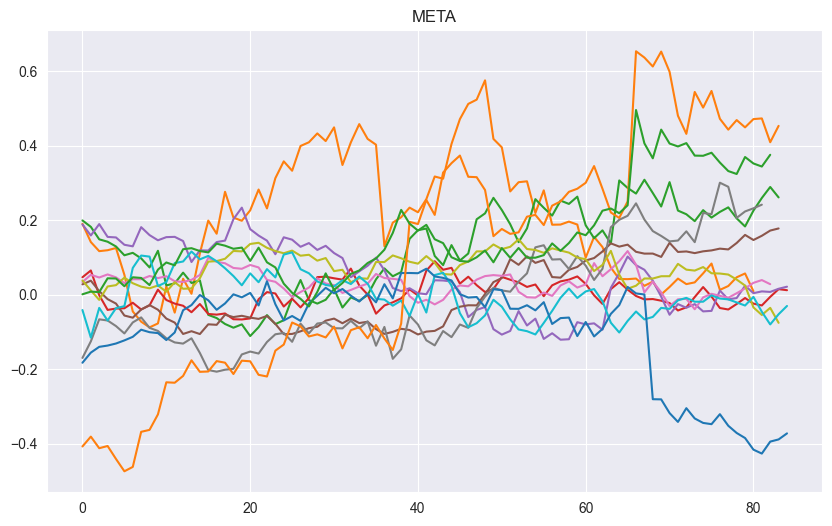

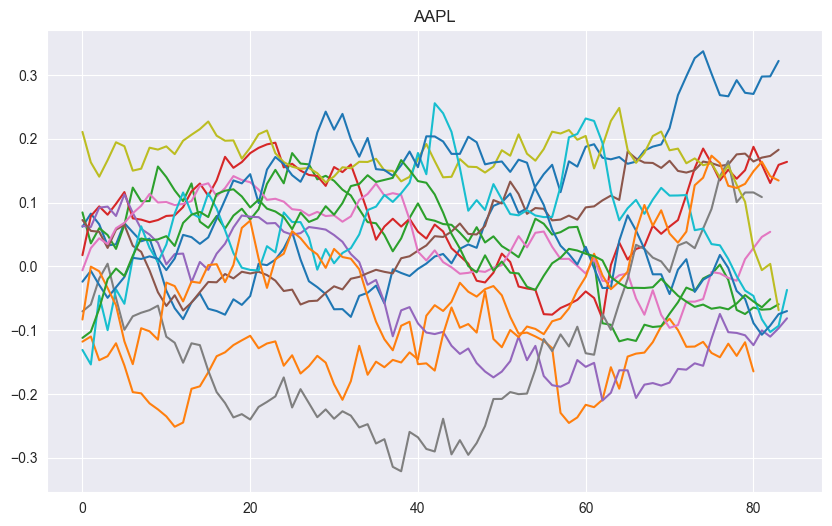

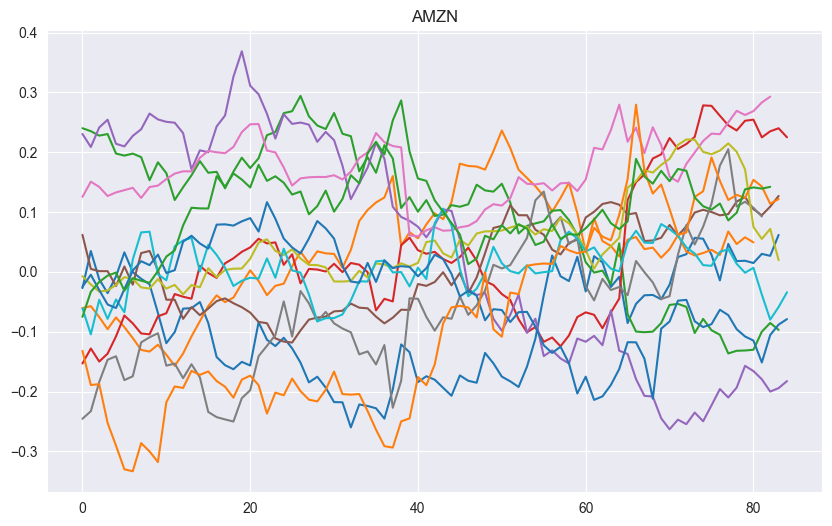

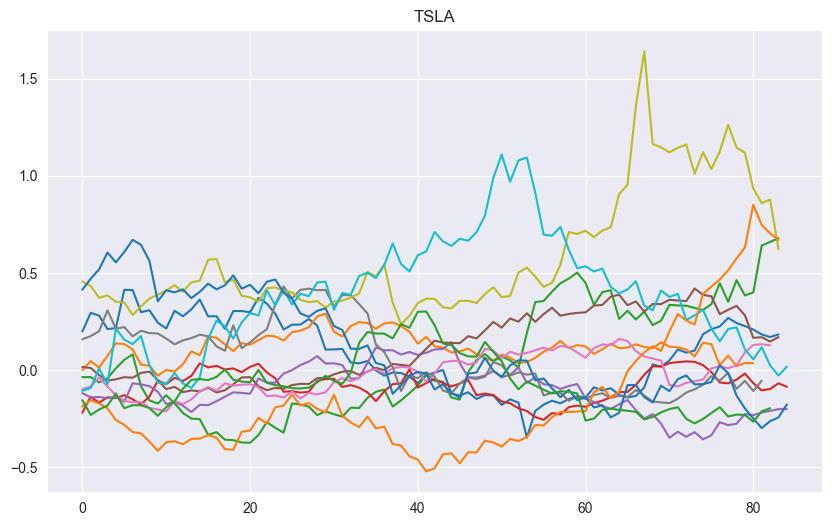

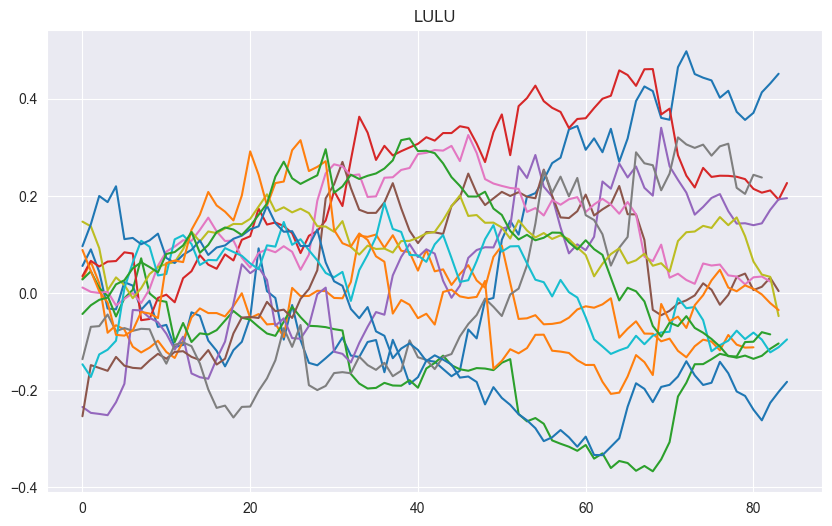

In [59]:
after_sep = fut_rets[(9 <= fut_rets.index.month) & (fut_rets.index.month <= 12)]

for t in tickers:
    plt.figure(figsize=(10, 6))
    for _df_y in after_sep[t].groupby(after_sep.index.year):
        if _df_y[1].index.year[0] <= 2010:
            continue
        plt.plot(_df_y[1].values)
    
    plt.title(t)
    plt.show()

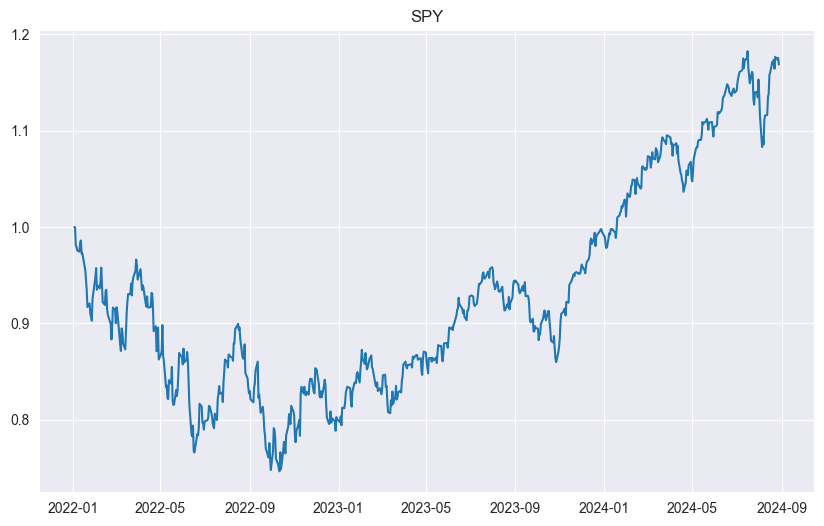

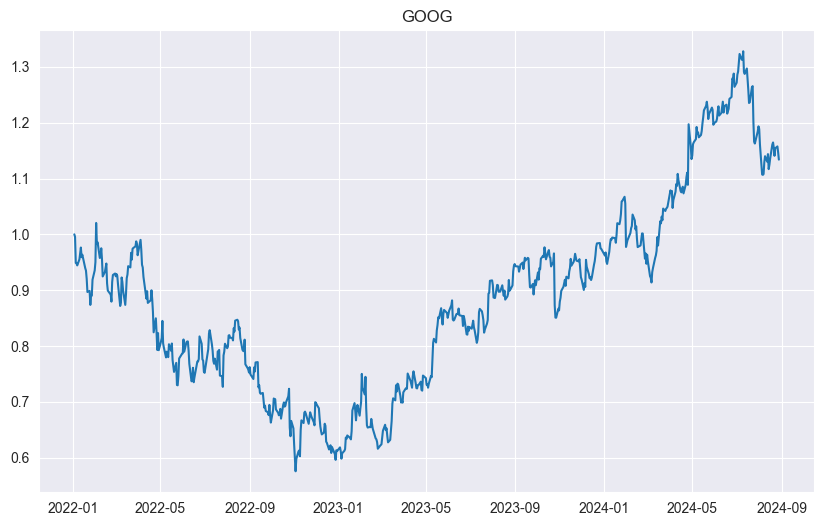

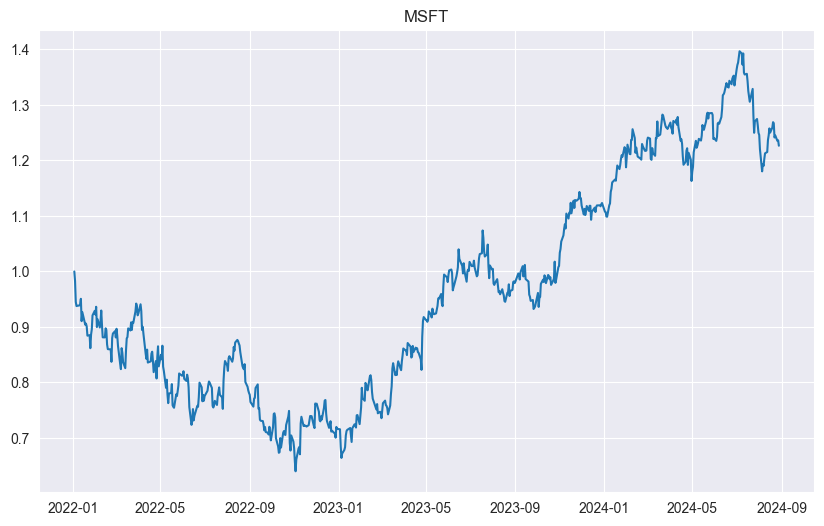

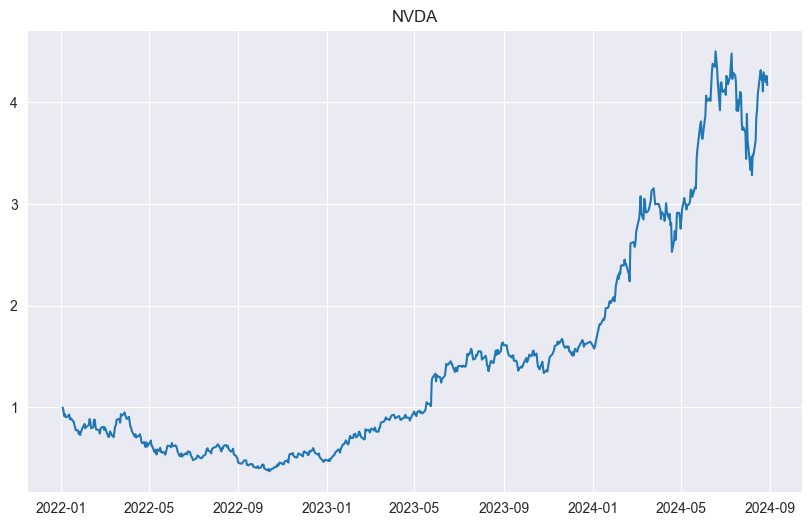

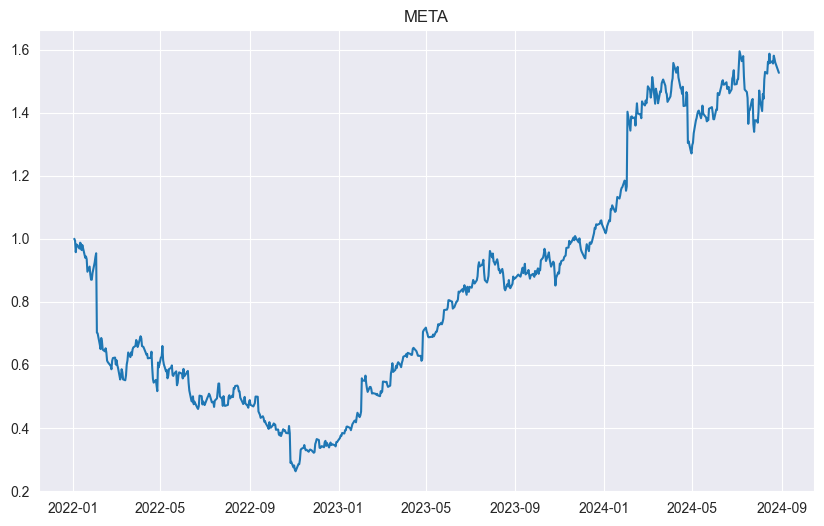

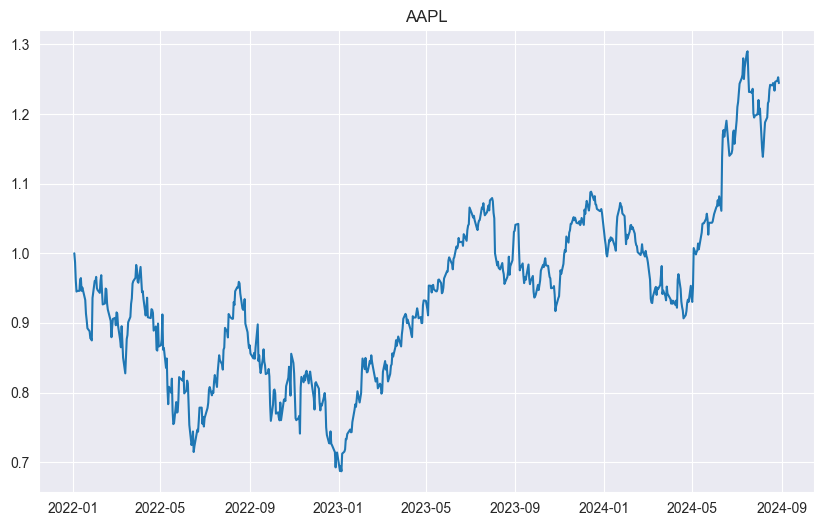

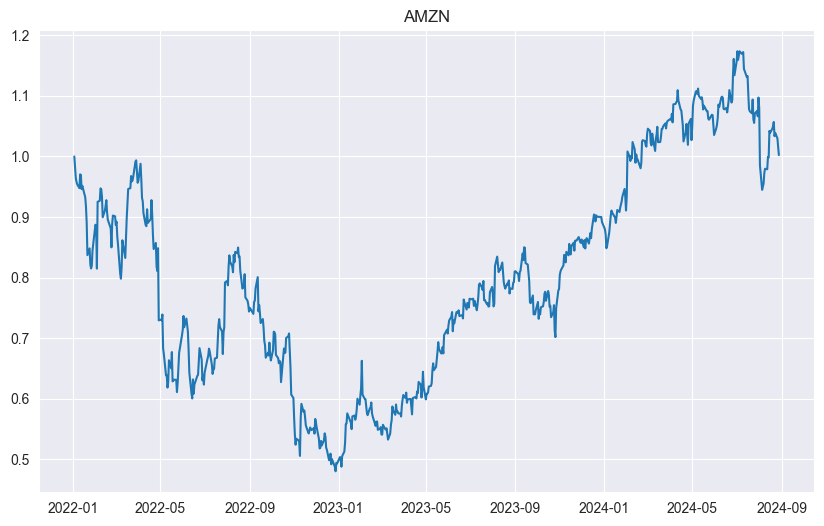

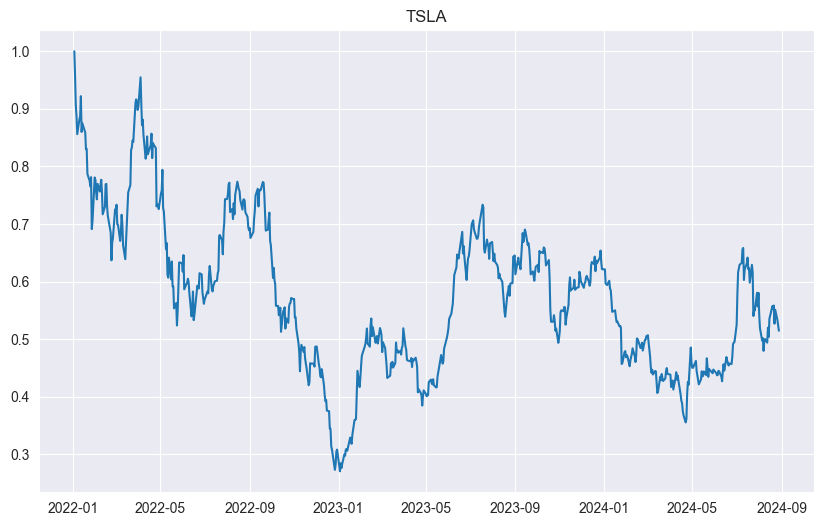

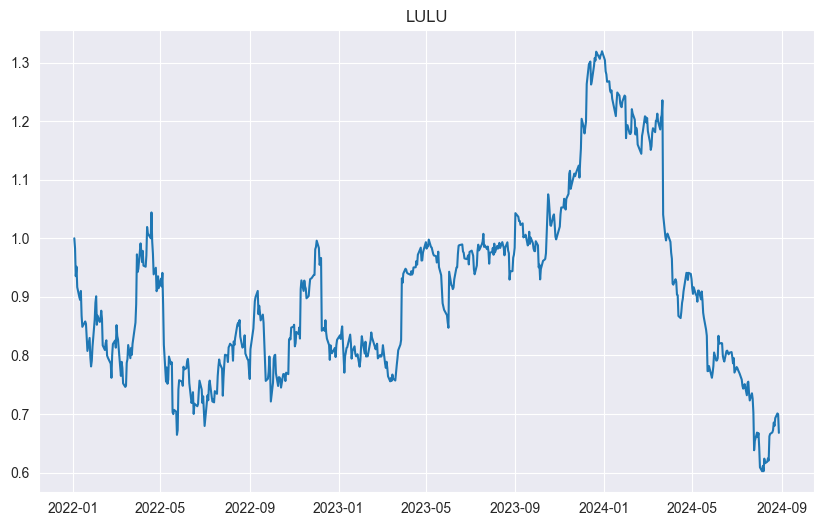

In [65]:
for t in tickers:
    _df = (df[df.index >= '2022-01-01'] / df[df.index >= '2022-01-01'].iloc[0])[t]
    plt.figure(figsize=(10, 6))
    plt.plot(_df)
    plt.title(t)
    plt.show()

<Axes: xlabel='Date'>

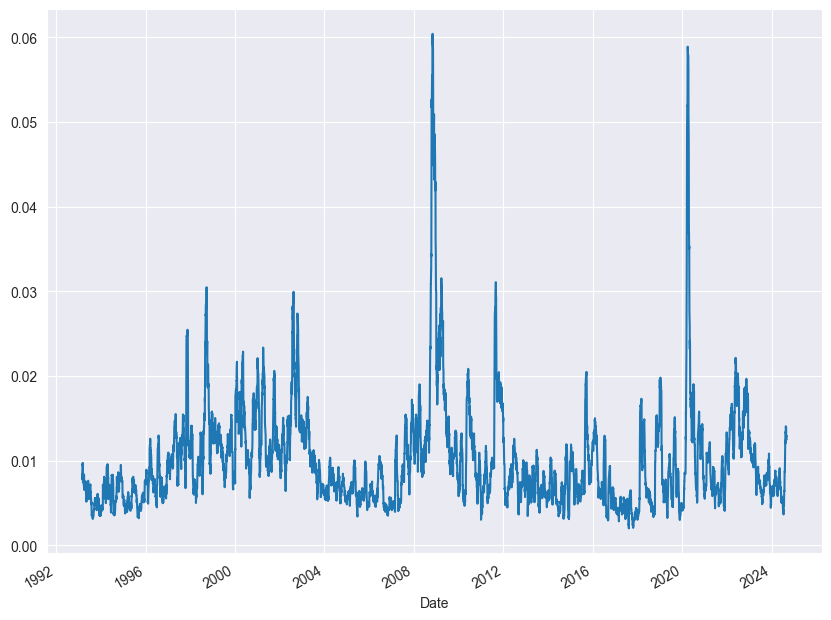

In [71]:
df['SPY'].pct_change().rolling(window=20).std().plot(figsize=(10, 8))